## Import Libraries for data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

C:\Users\94777\AppData\Local\Temp\ipykernel_4780\2625918399.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load data from csv
data = pd.read_csv(r'Data/Extracted_MFCCs.csv')
data.head()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,aggressiveness
0,-581.18304,61.775310,0.334518,8.486256,0.788418,11.279878,-6.216891,0.534891,2.526564,-0.257104,-0.805913,-0.914089,-2.371790,1
1,-574.66840,56.525585,-2.960935,8.754062,1.412463,7.794606,-5.879593,-1.438899,0.365388,-1.025561,-1.278394,-1.151001,-9.105648,1
2,-628.37790,69.173580,-5.179301,4.144491,-2.561467,12.802252,-1.245774,0.469771,1.913076,-0.159788,-1.885625,-7.068508,-4.552937,1
3,-577.23940,67.032510,5.281436,11.227827,3.101099,18.982237,-5.887117,1.355586,6.083599,1.585905,2.887235,3.166880,-1.952211,1
4,-540.83923,89.908420,8.104260,13.206378,1.857440,19.507902,-5.437987,3.933926,7.808056,0.806630,1.848405,-6.200817,-10.122912,1


In [3]:
# Devide to indipendant and dependant variables
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [4]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [5]:
x_train

array([[-3.12252440e+02,  1.10395935e+02,  5.50298700e+00, ...,
        -9.92282900e+00,  1.43778230e+00, -3.65631200e+00],
       [-3.84628020e+02,  7.00578100e+01, -1.55620740e+00, ...,
         2.55144900e-01, -1.44640200e+00, -4.73728130e+00],
       [-3.58738830e+02,  9.27196600e+01,  4.92793800e+01, ...,
        -2.39696380e+00, -7.86478040e-01, -1.86968020e+00],
       ...,
       [-4.15296540e+02,  5.06668000e+01,  5.14328540e-01, ...,
        -9.52846100e+00, -1.60183270e+00, -1.65781450e+00],
       [-3.75179900e+02,  7.93287050e+01,  4.47799000e+01, ...,
        -1.49006600e+00, -8.65304100e-01, -5.68980930e+00],
       [-3.97866150e+02,  1.19411415e+02,  4.18258500e+01, ...,
        -2.45105960e+00, -5.58940500e+00, -2.96286700e+00]])

In [6]:
# Get the data count of unique labels
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))


{0: 1481, 1: 1508}

In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2989, 13), (748, 13), (2989,), (748,))

In [8]:
# Scale data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [9]:
# import pickle
# # Save the scaler
# with open('Models//scaler_2.pickle', 'wb') as f:
#     pickle.dump(sc, f)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2989, 13), (748, 13), (2989,), (748,))

In [11]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2989, 13, 1), (748, 13, 1), (2989,), (748,))

## Modeling

#### Import Libraries for Model

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv1D,MaxPooling1D
from tensorflow.keras.optimizers import Adam

In [14]:
intializer = tf.keras.initializers.glorot_normal(seed=None)

In [15]:
model = Sequential()
model.add(Conv1D(128, 5,padding='same',
                input_shape=(13,1)))
model.add(Activation('relu'))

model.add(Conv1D(512, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=(8)))

model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
# model.add(Dropout(0.5))

model.add(Conv1D(512, 5,padding='same'))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dropout(0.5))

model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Conv1D(128, 5,padding='same'))
model.add(Flatten())

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13, 128)           768       
                                                                 
 activation (Activation)     (None, 13, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 512)           328192    
                                                                 
 activation_1 (Activation)   (None, 13, 512)           0         
                                                                 
 dropout (Dropout)           (None, 13, 512)           0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 1, 512)            0         
 D)                                                              
                                                        

In [17]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              optimizer=Adam(learning_rate=0.0001))

In [18]:
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),batch_size=128)

Epoch 1/100


24/24 [==============================] - 2s 38ms/step - loss: 0.6825 - accuracy: 0.6825 - val_loss: 0.6686 - val_accuracy: 0.7567
Epoch 2/100
24/24 [==============================] - 1s 36ms/step - loss: 0.5602 - accuracy: 0.7966 - val_loss: 0.5045 - val_accuracy: 0.8316
Epoch 3/100
24/24 [==============================] - 1s 33ms/step - loss: 0.4160 - accuracy: 0.8280 - val_loss: 0.4369 - val_accuracy: 0.8316
Epoch 4/100
24/24 [==============================] - 1s 30ms/step - loss: 0.3865 - accuracy: 0.8431 - val_loss: 0.4066 - val_accuracy: 0.8382
Epoch 5/100
24/24 [==============================] - 1s 34ms/step - loss: 0.3722 - accuracy: 0.8558 - val_loss: 0.3820 - val_accuracy: 0.8583
Epoch 6/100
24/24 [==============================] - 1s 31ms/step - loss: 0.3494 - accuracy: 0.8622 - val_loss: 0.3664 - val_accuracy: 0.8650
Epoch 7/100
24/24 [==============================] - 1s 34ms/step - loss: 0.3282 - accuracy: 0.8765 - val_loss: 0.3410 - val_accuracy: 0.8757
Epoc

In [19]:
def show_graphs(history):
    epochs = [i for i in range(100)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(30,12)
    ax[0].plot(epochs , train_loss , label = 'Training Loss')
    ax[0].plot(epochs , test_loss , label = 'Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
    ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()

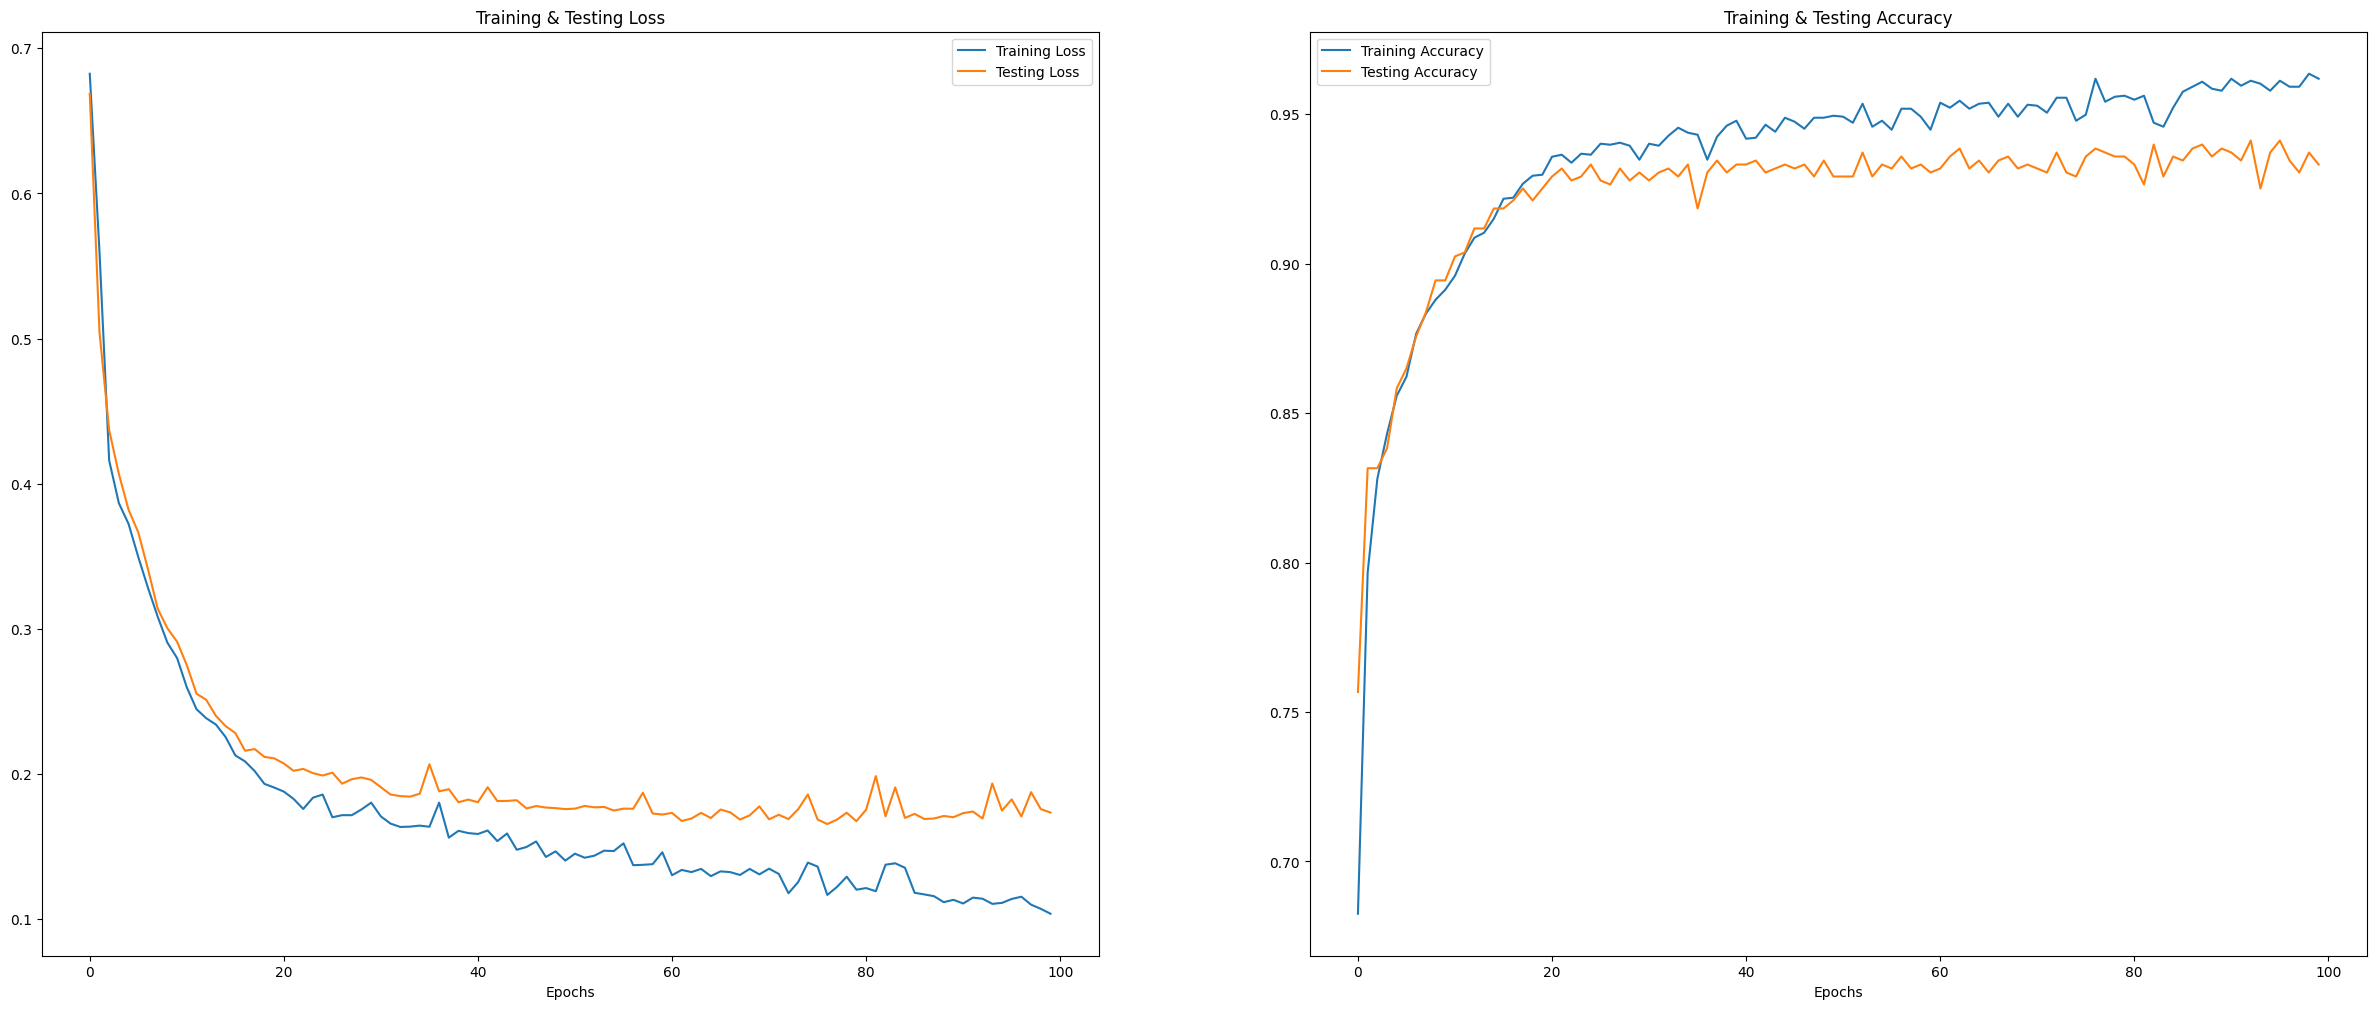

In [20]:
show_graphs(model.history)

### Conlusion

Since Testing loss is higher than the Training loss, it seems to like overfitting. It can be sort out with Dropout layers.

In [38]:
y_pred = model.predict(x_test)

24/24 [==============================] - 0s 4ms/step


In [39]:
y_pred = np.array([1 if y>=0.9 else 0 for y in y_pred]) #Threshold

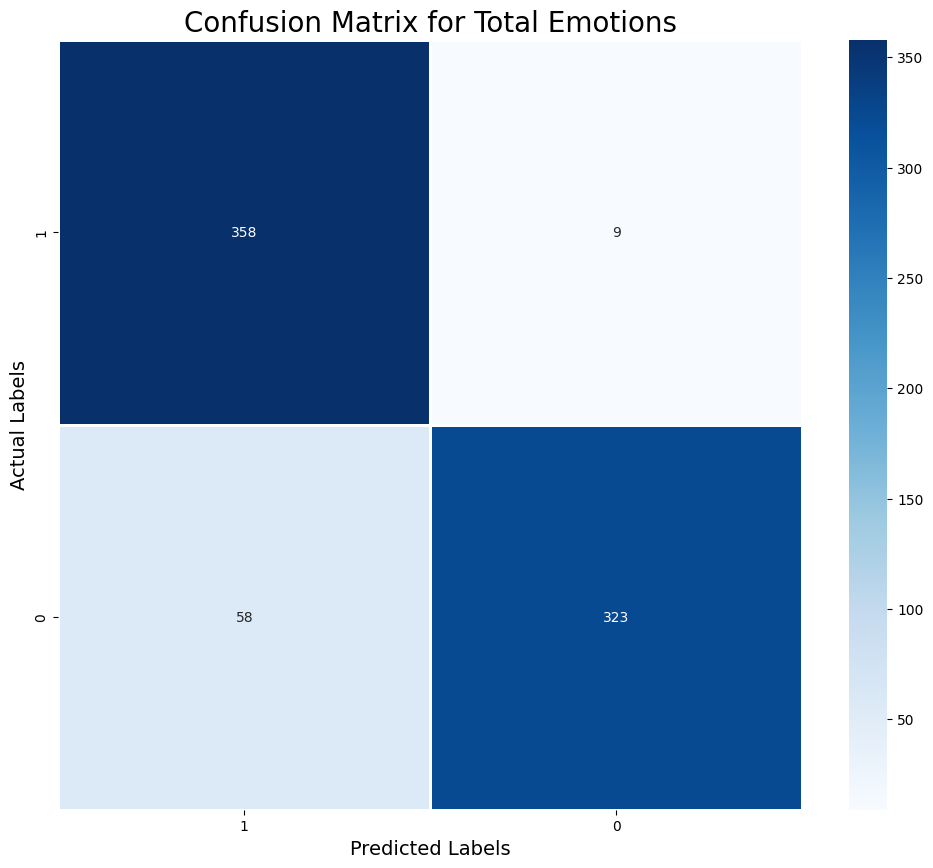

In [40]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [1,0] , columns = [1,0])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Total Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [41]:
accuracy_score(y_test, y_pred)

0.910427807486631

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       367
           1       0.97      0.85      0.91       381

    accuracy                           0.91       748
   macro avg       0.92      0.91      0.91       748
weighted avg       0.92      0.91      0.91       748



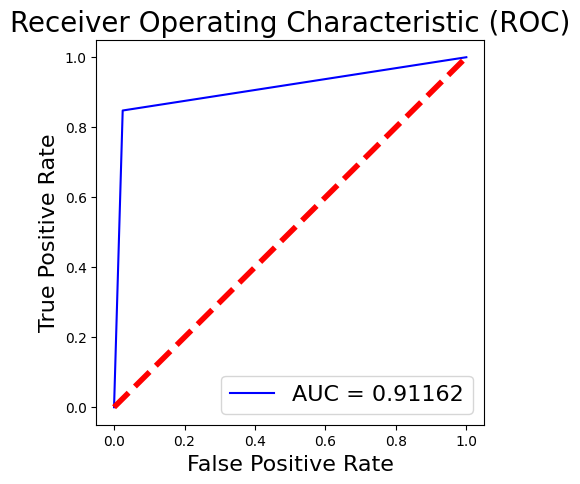

In [43]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic (ROC)', size=20)
plt.plot(fpr, tpr, color='blue', label='AUC = %0.5f' % roc_auc)
plt.legend(loc='lower right', prop={'size': 16})
plt.plot([0, 1], [0, 1], linestyle='--', color='red', linewidth=4, label='Random Chance')
plt.axis('tight')
plt.ylabel('True Positive Rate', size=16)
plt.xlabel('False Positive Rate', size=16)
plt.show()

In [27]:
# # Save model
# model.save('Models/cnn_model_1.h5')

### Testing

In [28]:
import librosa

In [29]:
def extract_mfcc(signal, sample_rate=22050, n_mfcc=13, n_fft=2048, hop_length=512):
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    return np.mean(mfccs.T, axis=0)

In [30]:
# import noisereduce as nr
# import librosa
# import soundfile as sf

# def apply_noise_reduction(input_path, output_path):
#     # Load the audio file
#     audio, sr = librosa.load(input_path, sr=22050)

#     # Perform noise reduction
#     reduced_audio = nr.reduce_noise(audio, sr=22050)

#     # Save the denoised audio
#     sf.write(output_path, reduced_audio,22050)

# # Example usage
# input_path = r"Test Audio\aggressive.mp3"
# output_path = 'denoised__agg_audio.wav'
# apply_noise_reduction(input_path, output_path)


In [31]:
signal, sample_rate = librosa.load("denoised__non_agg_audio.wav", sr=22050)

In [32]:
features = extract_mfcc(signal)
# Scale data
features = sc.transform(features.reshape(1,-1))
features = np.expand_dims(features, axis=2)

In [33]:
model.predict(features)

1/1 [==============================] - 0s 16ms/step


array([[0.01037468]], dtype=float32)

In [34]:
signal, sample_rate = librosa.load("denoised__agg_audio.wav", sr=22050)

In [35]:
features = extract_mfcc(signal)
# Scale data
features = sc.transform(features.reshape(1,-1))
features = np.expand_dims(features, axis=2)

In [36]:
model.predict(features)

1/1 [==============================] - 0s 23ms/step


array([[0.9532491]], dtype=float32)

In [37]:
# # Save model
# model.save('Models/cnn_model_2.h5')